# FFTW and FFTs

Here we introduce the package FFTW, that can be used to perform the fast Fourier transforms (ffts) in julia.

In [2]:
using FFTW
using LinearAlgebra
using Plots

## Section 1 - Input of FFT

### Section 1.1 - One-dimensional FFT

Fourier transform converts a real- and complex-valued arrays of arbitrary size into Fourier coefficients. 

In below, we show that the results are the same whether the input is a row vector or a column vector.

In [100]:
fft([0; 1; 2; 1])

4-element Array{Complex{Float64},1}:
  4.0 + 0.0im
 -2.0 + 0.0im
  0.0 + 0.0im
 -2.0 + 0.0im

In [101]:
fft([0, 1, 2, 1])

4-element Array{Complex{Float64},1}:
  4.0 + 0.0im
 -2.0 + 0.0im
  0.0 + 0.0im
 -2.0 + 0.0im

### Section 1.2 - Two-dimensional FFT

In the following example, we do fft on a 4*4 matrix. 

* It's worth to notice that, if you write a 4*4 matrix in julia you should input like " [0 1 2 1;1 2 3 5;2 3 6 9;1 8 6 9] ", this expression method is different with what we write in matlab.

```diff
- TS: I don't quite get it, I thought its the same as in Matlab?
```

In [102]:
fft([0 1 2 1;1 2 3 5;2 3 6 9;1 8 6 9])

4×4 Array{Complex{Float64},2}:
  59.0+0.0im   -13.0+10.0im  -17.0+0.0im  -13.0-10.0im
 -16.0+13.0im    4.0-9.0im     4.0-7.0im    0.0+3.0im 
 -11.0+0.0im     1.0+2.0im     9.0+0.0im    1.0-2.0im 
 -16.0-13.0im    0.0-3.0im     4.0+7.0im    4.0+9.0im 

## Section 2 - Operation time of FFT

The following two examples tell us that fast Fourier transforms (ffts) is efficient. 
* We can discover that the first time we do Fourier transform cost more time than others, this is because of that fft will always copy a real input array to complex array first before performing the transform.
* Notice that if we use @time to calculate time, it need to do more times to get the average.

In [103]:
x = randn(92993)
@time y = fft(x);
x = randn(92993)
@time y = fft(x);
x = randn(92993)
@time y = fft(x);
x = randn(92993)
@time y = fft(x);

  0.121808 seconds (61 allocations: 2.841 MiB)
  0.124316 seconds (60 allocations: 2.841 MiB)
  0.151519 seconds (60 allocations: 2.841 MiB)
  0.151231 seconds (60 allocations: 2.841 MiB)


* From the following two examples, we can obviously discover that even number do Fourier transform is more efficient than odd number.

In [104]:
x = randn(2^17)
@time y = fft(x);
x = randn(2^17)
@time y = fft(x);
x = randn(2^17)
@time y = fft(x);
x = randn(2^17)
@time y = fft(x);

  0.018783 seconds (60 allocations: 4.003 MiB)
  0.023107 seconds (60 allocations: 4.003 MiB, 17.47% gc time)
  0.018942 seconds (60 allocations: 4.003 MiB)
  0.017443 seconds (60 allocations: 4.003 MiB)


In [105]:
x = randn(2^17-1)
@time y = fft(x);
x = randn(2^17-1)
@time y = fft(x);
x = randn(2^17-1)
@time y = fft(x);

  0.150332 seconds (60 allocations: 4.003 MiB)
  0.122540 seconds (60 allocations: 4.003 MiB)
  0.157982 seconds (60 allocations: 4.003 MiB, 3.98% gc time)


## Section 3 - Accuracy of FFT

Now we want to test the accuracy of fft and ifft.
* First, we store what we want to transform into a. 
* Second, we use norm to measure the error between ifft(fft(a)) and a. 

If we get small error, it represent that fft and ifft are very accurate to convert function values into Fourier coefficients.

## norm(A,p)

For any A that including arrays of any dimension, compute the p-norm (defaulting to p=2) as if A were a vector of the corresponding length.

p-norm : $∥A∥_p=(\sum_{i=1}^{n}|a_i|^p)^{1/p} $
* n represent the length of A
* Since the p-norm is computed using the norms of the entries of A, the p-norm of a vector of vectors is not compatible with the interpretation of it as a block vector in general if p != 2.
* Specially:
#####  norm(A, Inf) returns the largest value in abs.(A)
#####  norm(A, -Inf) returns the smallest value in abs.(A)
#####  If A is a matrix and p=2, then this is equivalent to the Frobenius norm

But actually, p is not necessary part for norm, we usually implement norm(A) without second argument.

In [106]:
a = rand(8) + im*rand(8);
norm(ifft(fft(a)) - a)

1.8410966031475738e-16

In [107]:
a = rand(2^17) + im*rand(2^17);
norm(ifft(fft(a)) - a)

9.965942911096463e-14

In [108]:
a = rand(2^17-1) + im*rand(2^17-1);
norm(ifft(fft(a)) - a)

2.3511175527014857e-13

## Section 4 - Examples

Now we use $y = \sin(x)$ and $y = \cos(x)$ to see the operation of fft. 
* Because $y = \sin(x)$ and $y = \cos(x)$ is periodic function so the range is from 0 to $2\pi$
* We choose N+1 points between 0 to $2\pi$ so x = range(0,stop=2*pi,length=N+1), but since that $\sin(0)$ and $\sin(2\pi)$ are same so x = x[1:N]

In [109]:
N=100;
x = range(0,stop=2*pi,length=N+1);
x = x[1:N];
k = [0:N/2, -N/2+1:-1]

2-element Array{StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}},1}:
 0.0:1.0:50.0  
 -49.0:1.0:-1.0

Now we want to get Fourier coefficient of $y = \sin(x)$.
* First, because x is an array so we use fs = sin.(x), then we store the value in fs.
* Second, we do Fourier transform and store it in fs_hat.
* Third, we plot the imaginary part of the results afjer transforming. 

By Euler's function $\sin(\theta) = \frac{e^{i\theta} - e^{-i\theta}}{2i} = \frac{1}{2i}(e^{i\theta} - e^{-i\theta})$

##### In the following is the formula of discrete Fourier transform:

$\hat{v_k}=\frac{2\pi}{N}\sum_{j=1}^{N}e^{-ik{x_j}}{v_j}$

##### the formula of inverse discrete Fourier transform:

$\hat{v_k}=\frac1{2\pi}\sum_{k={-N/2+1}}^{N/2}e^{-ik{x_j}}\hat{v_k}$

So we compare $\sin(\theta) = \frac{e^{i\theta} - e^{-i\theta}}{2i} = \frac{1}{2i}(e^{i\theta} - e^{-i\theta})=\frac{1}{2 \pi}(-i \pi e^{i\theta} + i \pi e^{-i\theta} )$ with the formula of inverse discrete Fourier transform, we can discover $\hat{fs}_1=i\pi$ $\hat{fs}_{-1}=-i\pi$

##### But in julia the formula of discrete Fourier transform is:

$\hat{v_k}=\sum_{j=1}^{N}e^{-ik{x_j}}{v_j}$

##### the formula of inverse discrete Fourier transform is:

$\hat{v_k}=\frac1{N}\sum_{k={-N/2+1}}^{N/2}e^{-ik{x_j}}\hat{v_k}$

$\sin(\theta) = \frac{e^{i\theta} - e^{-i\theta}}{2i} = \frac{1}{2i}(e^{i\theta} - e^{-i\theta})=\frac{1}{N}(\frac{-i N}{2} e^{i\theta} + \frac{i N}{2} e^{-i\theta} )$, so $\hat{fs}_1={-iN}/2$ $\hat{fs}_{-1}=iN/2$

$\sin(n\theta) = \frac{e^{in\theta} - e^{-in\theta}}{2i} = \frac{1}{2i}(e^{in\theta} - e^{-in\theta})=\frac{1}{N}(\frac{-inN}{2} e^{i\theta} + \frac{inN}{2} e^{-i\theta} )$, so $\hat{fs}_n={-inN}/2$ $\hat{fs}_{-n}=inN/2$


* this is the literature we can reference: https://jakevdp.github.io/blog/2013/08/28/understanding-the-fft/

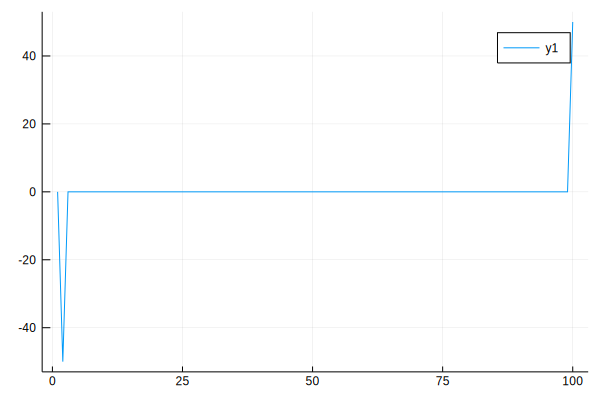

In [110]:
fs = sin.(x);
fs_hat = fft(fs);
plot(imag(fs_hat))

Since that, by Euler's function $\cos(\theta) = \frac{e^{i\theta} + e^{-i\theta}}{2} = \frac{1}{N}(\frac{- N}{2} e^{i\theta} + \frac{ N}{2} e^{-i\theta} )$

and we get Fourier's coefficient by discrete Fourier transform so $\hat{fs}_1 = 50$, $\hat{fs}_{-1} = -50$

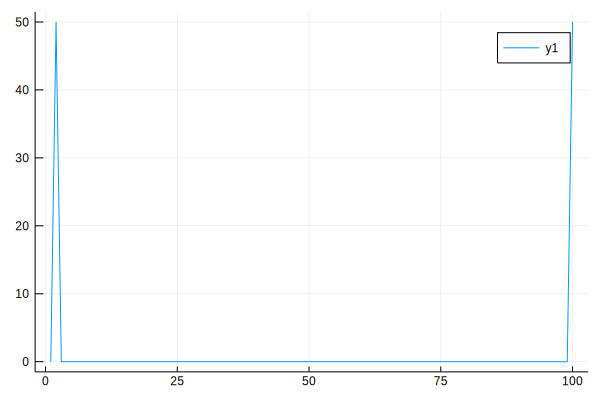

In [111]:
fc = cos.(x);
fc_hat = fft(fc);
plot(real(fc_hat))

In [112]:
N=1000;
x = range(0,stop=2*pi,length=N+1);
x = x[1:N];
k = [0:N/2, -N/2+1:-1]

2-element Array{StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}},1}:
 0.0:1.0:500.0  
 -499.0:1.0:-1.0

Since that, by Euler's function 
* $\sin(\theta) = \frac{e^{i\theta} - e^{-i\theta}}{2i} = \frac{1}{N}(\frac{-i N}{2} e^{i\theta} + \frac{i N}{2} e^{-i\theta} )$
* $\sin(100\theta) = \frac{e^{i100\theta} - e^{-i100\theta}}{2i} =  \frac{1}{N}(\frac{-i100N}{2} e^{i\theta} + \frac{i100N}{2} e^{-i\theta} )$                              

and we get Fourier's coefficient by discrete Fourier transform so 
* $\hat{fs}_1 =\frac{1}{i}50$, $\hat{fs}_{-1} = \frac{1}{i}(-50)$
* $\hat{fs}_{100} =\frac{1}{i}5000$, $\hat{fs}_{-100} = \frac{1}{i}(-5000)$

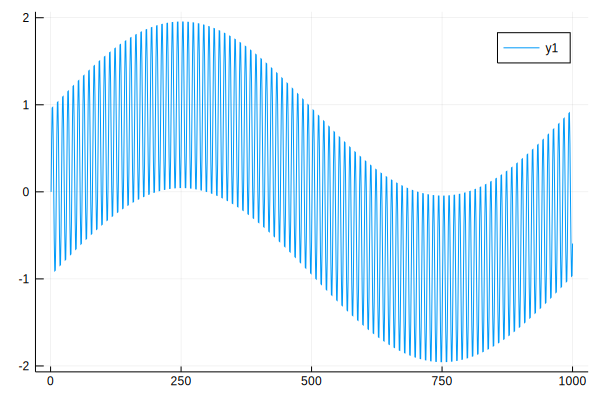

In [113]:
fw = sin.(x)+sin.(100*x);
fw_hat = fft(fw);
plot(fw)

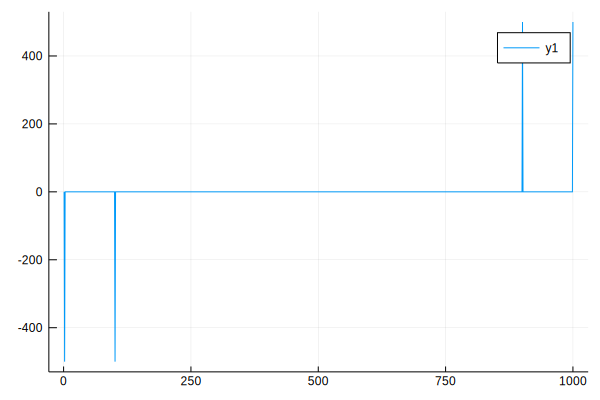

In [114]:
plot(imag(fw_hat))

## Section 5 - Aliasing 

From the below diagram, we could find out that there only have two fourier coefficients, but theroticallly there must have four fourier coefficients.

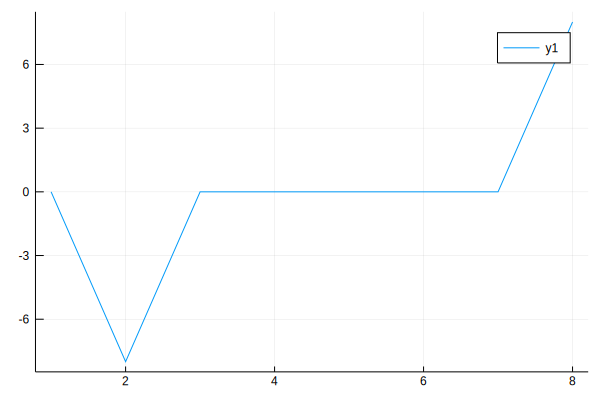

In [115]:
N=8;
x = range(0,stop=2*pi,length=N+1);
x = x[1:N];
fh=sin.(x)+sin.(9*x);
fh_hat=fft(fh);
plot(imag(fh_hat))

In the below, we set N=8, and plot both sinx and sin(9*x), we can discover that the diagram are same, so we know that the diagram of sin(9*x) has some mistake.

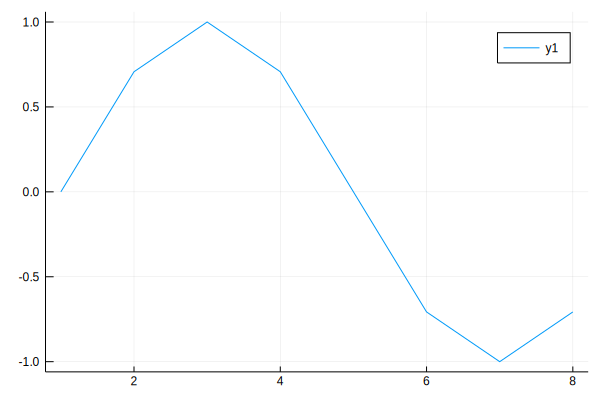

In [116]:
N=8;
x = range(0,stop=2*pi,length=N+1);
x = x[1:N];
fh=sin.(x)
plot(fh)

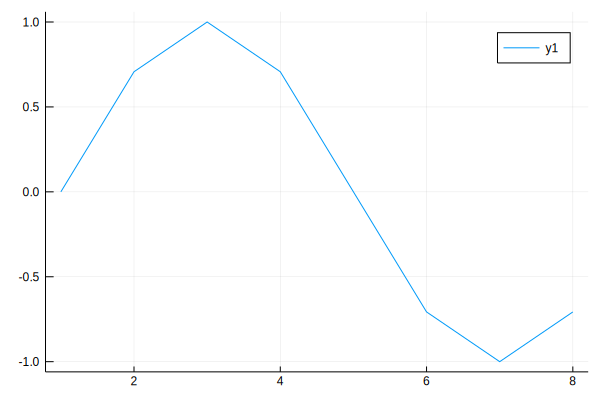

In [117]:
N=8;
x = range(0,stop=2*pi,length=N+1);
x = x[1:N];
fh=sin.(9*x)
plot(fh)

From the below, we can conclude that if we select large enough N, we can obtain the correct diagrm of sin(9*x).

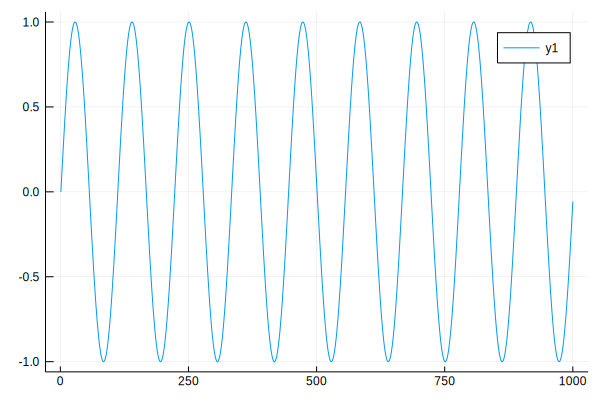

In [118]:
N=1000;
x = range(0,stop=2*pi,length=N+1);
x = x[1:N];
fh=sin.(9*x)
plot(fh)

So, we can also conclude that, if we choose too small "N", we cant get the correct diagram of sin(9*x).

e.g. When we choose N=8, the diagram of sinx and sin(9*x) are same.

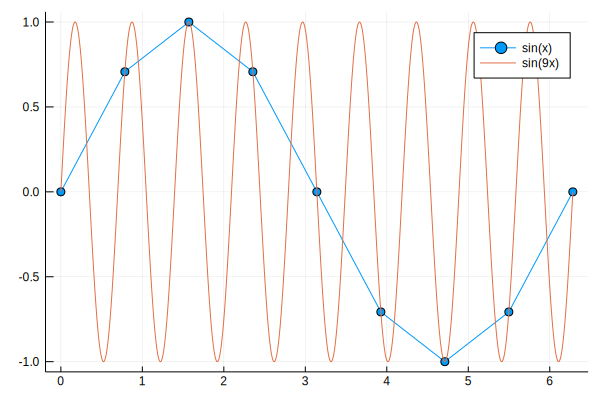

In [119]:
N=8;
x = range(0,stop=2*pi,length=N+1);
f=sin.(x);
u=plot(x,f,marker=:circle,label="sin(x)");
NN=1000;
xx = range(0,stop=2*pi,length=NN+1);
fh=sin.(9*xx);
plot!(u,xx,fh,label="sin(9x)")

### Section 5.1 - Zero-padding 
The definition of zero-padding is adding zeros to end of a time-domain signal to increase the length.

Using zero-padding has some reason:
* If there is a power-of-two number of samples(that is, if the time-domain length of waveform is power of two), this can lead to speeding up the processing time.

## Example 1
Now we want to find fourier coefficients of sin(3x)^2 through sin(3x).

According to the above example we know that, by DFT $\sin(3\theta) = \frac{1}{N}(\frac{-i3N}{2} e^{i\theta} + \frac{i3N}{2} e^{-i\theta} )$ , then we get Fourier's coefficients by discrete Fourier transform  $\hat{fs}_3 =\frac{12}{i}$, $\hat{fs}_{-3} =\frac{-12}{i}$.

And when we set the number of grids N=8, then the wave number k=-3,-2,-1,0,1,2,3,4 , so it's enough. 

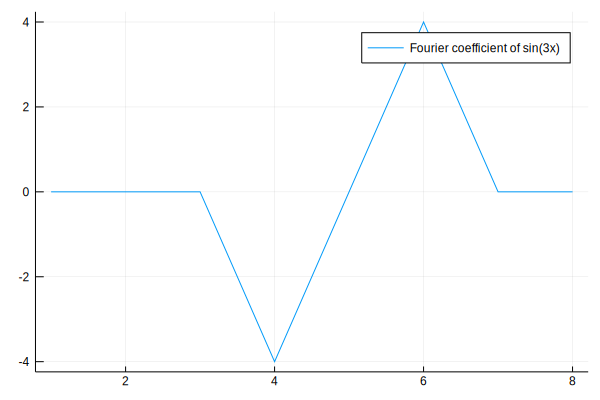

In [120]:
N=8;
x = range(0,stop=2*pi,length=N+1);
x = x[1:N];
fd=sin.(3*x);
fd_hat=fft(fd);
plot(imag(fd_hat),label="Fourier coefficient of sin(3x)")

## Example 2
In the following we try to find the coefficients of $f(x)=\sin(3x)^2$, we still set the number of grids N=8, then the wave number k=-3,-2,-1,0,1,2,3,4 , and the result is wrong so we know that it's not enough.

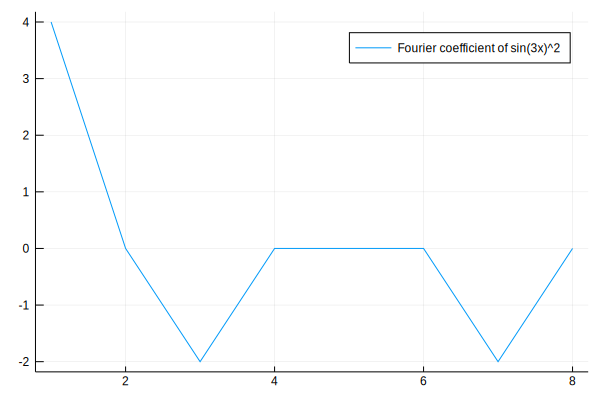

In [121]:
N=8;
x = range(0,stop=2*pi,length=N+1);
x = x[1:N];
fk=(sin.(3*x)).^2;
fk_hat=fft(fk);
plot(real(fk_hat),label="Fourier coefficient of sin(3x)^2")

We translate $f(x)=\sin(3x)^2$ into $\frac{1-\cos(6x)}{2} $, and since that $\frac{1-\cos(6x)}{2}=\frac{2-e^{6i}-e^{-6i}}{4}$ so we will find $\hat{fs}_0$, $\hat{fs}_6$ $\hat{fs}_{-6}$. 

So we should set N=16, then k=-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8. 

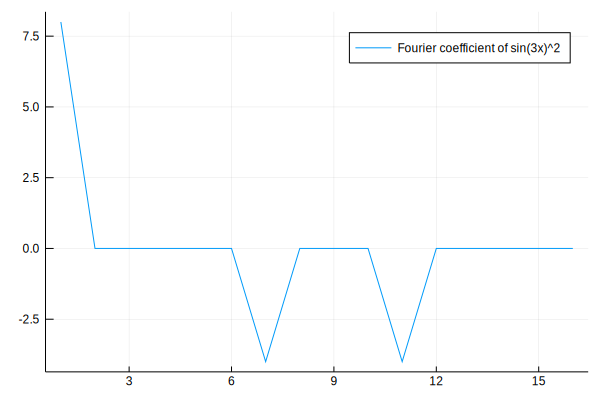

In [122]:
N=16;
x = range(0,stop=2*pi,length=N+1);
x = x[1:N];
fs=(sin.(3*x)).^2;
fs_hat=fft(fs);
plot(real(fs_hat),label="Fourier coefficient of sin(3x)^2")

## Conclusion
If we want to using the fourier coefficients of sin(3x) to find the fourier coefficients of sin(3x)^2, we can follow the following step:
* First we we do zero-padding, we add some fourier coefficients that equal to zero into the original fourier coefficients.
  
  e.g. According to the above examples, when it comes to sin(3x), we can find $\hat{fs}_3$  $\hat{fs}_{-3}$, so when we set N=8. But if it 
  comes to $f(x)=\sin(3x)^2$, we can find $\hat{fs}_0$ $\hat{fs}_6$ $\hat{fs}_{-6}$, we need to set N=16.
  
  So we need to add some fourier coefficients that equal to zero into the original fourier coefficients, that is $\hat{f}_0, \hat{f}_1, 
  \hat{f}_2, \hat{f}_3, \hat{f}_4, (\hat{f}_5, \hat{f}_6, \hat{f}_7, \hat{f}_8, \hat{f}_{-7}, \hat{f}_{-6}, \hat{f}_{-5}, \hat{f}_{-4}), 
  \hat{f}_{-3}, \hat{f}_{-2}, \hat{f}_{-1}$
  
  
* Before doing ifft we need to mutilpy the the coefficients after doing zero-padding by two, because the number of Fourier coefficients is     
  double.

  And also because in julia the formula of inverse discrete Fourier transform is:

  $\hat{v_k}=\frac1{N}\sum_{k={-N/2+1}}^{N/2}e^{-ik{x_j}}\hat{v_k}$, this formula is propotional to 1/N, so we need to mutilpy the the coefficients after doing zero-padding by two.

  
* Second, we do ifft.
   
   e.g. Then we transform the new fourier coefficients to sin(3x). And square the fuction.
   
   
* Third, we do fft to find the fourier coefficient of sin(3*x)^2

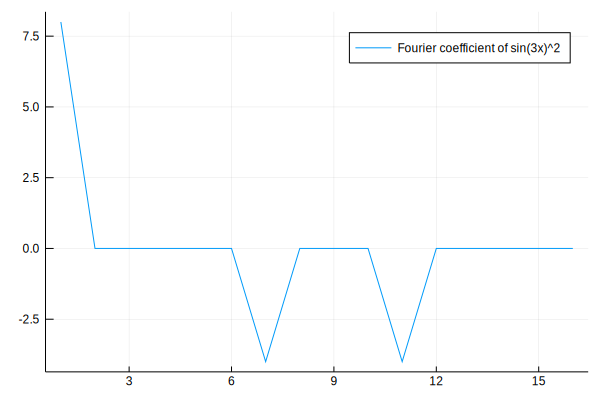

In [4]:
N=8;
x = range(0,stop=2*pi,length=N+1);
x = x[1:N];
f = sin.(3*x);
f_hat = fft(f)

b = append!(f_hat[1:8], zeros(8)+zeros(8)*im);
c = append!(f_hat[1:5],zeros(8));
d = append!(c,f_hat[6:8]);
d=d*2

fs = ifft(d);
g = fs.^2;

g_hat = fft(g)
plot(real(g_hat),label="Fourier coefficient of sin(3x)^2")

In [6]:
N=8;
x = range(0,stop=2*pi,length=N+1);
x = x[1:N];
f = sin.(3*x);
f_hat = fft(f)

b = append!(f_hat[1:8], zeros(8)+zeros(8)*im);
c = append!(f_hat[1:5],zeros(8));
d = append!(c,f_hat[6:8]);
d=d*2

16-element Array{Complex{Float64},1}:
 -1.7077025746869325e-15 + 0.0im                   
   8.353043791953632e-16 - 8.881784197001252e-16im 
   7.347880794884119e-16 + 1.1102230246251565e-15im
 -2.3048805381721868e-15 - 8.0im                   
   3.177278733663756e-15 + 0.0im                   
                     0.0 + 0.0im                   
                     0.0 + 0.0im                   
                     0.0 + 0.0im                   
                     0.0 + 0.0im                   
                     0.0 + 0.0im                   
                     0.0 + 0.0im                   
                     0.0 + 0.0im                   
                     0.0 + 0.0im                   
 -2.3048805381721868e-15 + 8.0im                   
   7.347880794884119e-16 - 1.1102230246251565e-15im
   8.353043791953632e-16 + 8.881784197001252e-16im 

## Truncation zero-padding (2/3-rule)
The basic idea of truncation zero-padding is set some fourier coefficients in the range to zero.

e.g. the range of K-vector:[-N/2,N/2], keep the sub-range [-K,-K] free of aliasing method, set fourier coefficients $uj^*=0$ in [-N/2,-K] and [N/2,K], K=N/3=(2/3)N/2, this is why we name it as (2/3-rule).

In [3]:
N=8;
x = range(0,stop=2*pi,length=N+1);
x = x[1:N];
f = sin.(3*x);
f_hat = fft(f)

#c=length(f_hat[1:4])-1

8-element Array{Complex{Float64},1}:
  -8.538512873434663e-16 + 0.0im                  
   4.176521895976816e-16 - 4.440892098500626e-16im
  3.6739403974420594e-16 + 5.551115123125783e-16im
 -1.1524402690860934e-15 - 4.0im                  
   1.588639366831878e-15 + 0.0im                  
 -1.1524402690860934e-15 + 4.0im                  
  3.6739403974420594e-16 - 5.551115123125783e-16im
   4.176521895976816e-16 + 4.440892098500626e-16im

In [4]:
for i = 1:length(f_hat[1:4]);
    if abs(i) <= 2/3*(length(f_hat[1:4]));
        f_hat[i]=0;
    end
end
for j = 1:length(f_hat[1:8]);
    if abs(j) >= length(f_hat[1:4])+2/3*length(f_hat[5:8]);
        f_hat[j]=0;
    end
end
print(f_hat)

Complex{Float64}[0.0 + 0.0im, 0.0 + 0.0im, 3.6739403974420594e-16 + 5.551115123125783e-16im, -1.1524402690860934e-15 - 4.0im, 1.588639366831878e-15 + 0.0im, -1.1524402690860934e-15 + 4.0im, 0.0 + 0.0im, 0.0 + 0.0im]

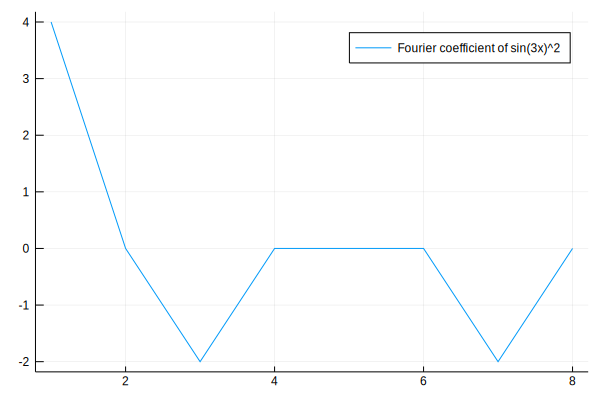

In [5]:
fc = ifft(f_hat);
l = fc.^2;
l_hat=fft(l)
plot(real(l_hat),label="Fourier coefficient of sin(3x)^2")

fft2